# Getting Started

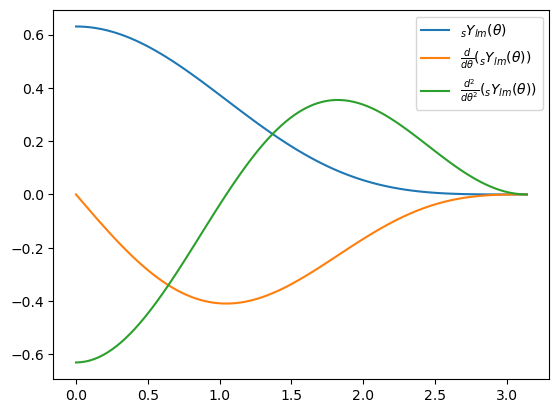

In [6]:
import spheroidal
import matplotlib.pyplot as plt
import numpy as np
from math import pi

# Compute the spin weighted spherical harmonic with s=-2, l=2, m=2 and its derivatives
Y = spheroidal.sphericalY(-2,2,2)
dY = spheroidal.sphericalY_deriv(-2,2,2)
d2Y = spheroidal.sphericalY_deriv2(-2,2,2)

# Plot as a function of theta at phi=0
theta = np.linspace(0,pi,100)
plt.plot(theta, Y(theta,0))
plt.plot(theta, dY(theta,0))
plt.plot(theta, d2Y(theta,0))
plt.legend([r"${}_sY_{lm}(\theta)$",
            r'$\frac{d}{d\theta}\left({}_sY_{lm}(\theta)\right)$',
            r'$\frac{d^2}{d\theta^2}\left({}_sY_{lm}(\theta)\right)$'])

plt.show()